In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

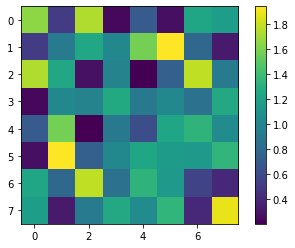

In [81]:
N_qubits = 3

#### for a unistocastic matrix
t = 1.0
A = np.random.uniform(0,1, size=(2**(N_qubits),2**(N_qubits)))
B = np.random.uniform(0,1, size=(2**(N_qubits),2**(N_qubits)))

H = np.zeros((2**N_qubits,2**N_qubits), dtype=complex)

H = A + 1j*B
H = H + np.conjugate(H).T

U = expm(1j*H*t)

plt.imshow(np.abs(H))
plt.colorbar()
plt.show()

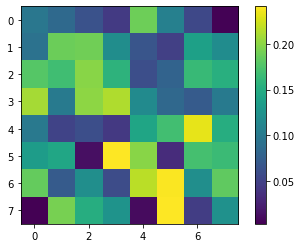

In [82]:
#### for a random probability matrix

M = np.zeros((2**N_qubits,2**N_qubits))
for i in range(2**N_qubits):
    col = np.random.uniform(0,1, size=(2**N_qubits))
    M[:,i] = col/sum(col)

plt.imshow(np.abs(M))
plt.colorbar()
plt.show()

In [83]:
def prob_matrix_check(matrix, decimals):
    col = [np.round(sum(matrix[:,i]), decimals=decimals)==1 for i in range(len(matrix))]
    row = [np.round(sum(matrix[i,:]), decimals=decimals)==1 for i in range(len(matrix))]

    if all(col):
        if all(row):
            return True, True
        else:
            return False, True
    elif all(row):
        return True, False
    return False, False


In [84]:
print("row, col:")
print(prob_matrix_check(np.abs(U)**2, decimals=4))
print(prob_matrix_check(M, decimals=4))

row, col:
(True, True)
(False, True)


In [85]:
U_tilde = U
C_CIC_ideal = U

C_CIC = U_tilde*np.abs(np.linalg.inv(U))**2
C_NIC = U_tilde

row, col:
0 ('X', 'X', 'X') CIC (False, False)
1 ('X', 'X', 'Y') CIC (False, False)
2 ('X', 'X', 'Z') CIC (False, False)
3 ('X', 'Y', 'X') CIC (False, False)
4 ('X', 'Y', 'Y') CIC (False, False)
5 ('X', 'Y', 'Z') CIC (False, False)
6 ('X', 'Z', 'X') CIC (False, False)
7 ('X', 'Z', 'Y') CIC (False, False)
8 ('X', 'Z', 'Z') CIC (False, False)
9 ('Y', 'X', 'X') CIC (False, False)
10 ('Y', 'X', 'Y') CIC (False, False)
11 ('Y', 'X', 'Z') CIC (False, False)
12 ('Y', 'Y', 'X') CIC (False, False)
13 ('Y', 'Y', 'Y') CIC (False, False)
14 ('Y', 'Y', 'Z') CIC (False, False)
15 ('Y', 'Z', 'X') CIC (False, False)
16 ('Y', 'Z', 'Y') CIC (False, False)
17 ('Y', 'Z', 'Z') CIC (False, False)
18 ('Z', 'X', 'X') CIC (False, False)
19 ('Z', 'X', 'Y') CIC (False, False)
20 ('Z', 'X', 'Z') CIC (False, False)
21 ('Z', 'Y', 'X') CIC (False, False)
22 ('Z', 'Y', 'Y') CIC (False, False)
23 ('Z', 'Y', 'Z') CIC (False, False)
24 ('Z', 'Z', 'X') CIC (False, False)
25 ('Z', 'Z', 'Y') CIC (False, False)
26 ('Z', 'Z'

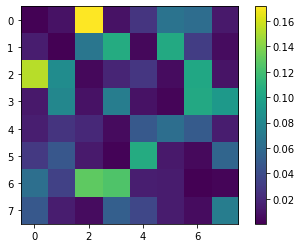

In [86]:
from qiskit.ignis.verification.tomography import state_tomography_circuits
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator

qr_basi = QuantumRegister(N_qubits)
qc_basi = QuantumCircuit(qr_basi)
tomography_basis = state_tomography_circuits(qc_basi, qr_basi)

print("row, col:")

for i, basis in enumerate(tomography_basis):
    basis.remove_final_measurements()
    # building the unitary matrix of the basis and the inverse.
    base_matrix_amplitudes = Operator(basis)
    base_matrix_amplitudes_inverse = base_matrix_amplitudes.transpose().conjugate()
    # building the probability matrices.
    base_matrix = np.abs(base_matrix_amplitudes)**2
    base_matrix_inverse = np.abs(base_matrix_amplitudes_inverse)**2

    #C_basis_NIC = np.abs(np.linalg.multi_dot([base_matrix_amplitudes, C_NIC,  base_matrix_amplitudes_inverse]))**2
    C_basis_NIC = np.linalg.multi_dot([base_matrix, C_NIC,  base_matrix_inverse])
    #C_basis_NIC = np.abs(np.dot(base_matrix_amplitudes, C_NIC))**2
    
    #C_basis_CIC = np.abs(np.linalg.multi_dot([base_matrix_amplitudes, C_CIC,  base_matrix_amplitudes_inverse]))**2
    C_basis_CIC = np.linalg.multi_dot([base_matrix, C_CIC,  base_matrix_inverse])
    #C_basis_NIC = np.abs(np.dot(base_matrix_amplitudes, C_NIC))**2

    #print(i,"NIC", prob_matrix_check(C_basis_NIC, decimals=4))
    print(i, basis.name, "CIC", prob_matrix_check(C_basis_CIC, decimals=4))

    if i == 26:
        plt.imshow(np.abs(C_basis_CIC))
        plt.colorbar()
        plt.show()
